In [36]:
import numpy as np

import visit_writer

from astropy.convolution import convolve, convolve_fft

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(0, 3, 4)

In [3]:
x

array([ 0.,  1.,  2.,  3.])

In [4]:
y = np.linspace(10, 13, 4)

In [5]:
y

array([ 10.,  11.,  12.,  13.])

In [6]:
np.meshgrid(x, y)[0]

array([[ 0.,  1.,  2.,  3.],
       [ 0.,  1.,  2.,  3.],
       [ 0.,  1.,  2.,  3.],
       [ 0.,  1.,  2.,  3.]])

Default ordering is y then x.

In [7]:
np.meshgrid(x, y, indexing='xy')[0]

array([[ 0.,  1.,  2.,  3.],
       [ 0.,  1.,  2.,  3.],
       [ 0.,  1.,  2.,  3.],
       [ 0.,  1.,  2.,  3.]])

In [8]:
np.meshgrid(x, y, indexing='ij')[0]

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.]])

ij ordering is y then x.

In [9]:
values = np.asarray([[ 0.,  0.,  0.,  0.],
                     [ 1.,  1.,  1.,  1.],
                     [ 2.,  2.,  2.,  2.],
                     [ 3.,  3.,  3.,  3.]])

In [10]:
mesh_xy = np.meshgrid(x, y, indexing='xy')
mesh_ij = np.meshgrid(x, y, indexing='ij')

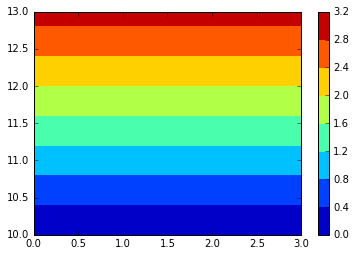

In [11]:
plt.contourf(mesh_xy[0], mesh_xy[1], values)
plt.colorbar()

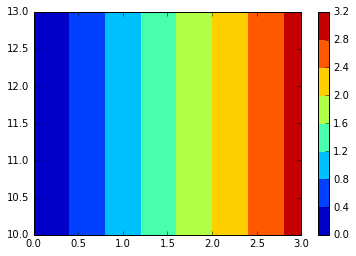

In [12]:
plt.contourf(mesh_ij[0], mesh_ij[1], values)
plt.colorbar()

In [13]:
z = (0,)
vars_visit = (('test', 1, 1, tuple(values.ravel())),)
visit_writer.WriteRectilinearMesh('test_visit_ordering.vtk', 1, tuple(x), tuple(y), tuple(z), vars_visit)

Visit repoduces the default meshgrid ordering

![alt text](visit_output_index_ordering.png "Title")

# Gradient of a 2d meshgrid field

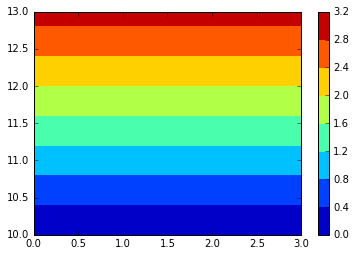

In [14]:
plt.contourf(mesh_xy[0], mesh_xy[1], values)
plt.colorbar()

In [15]:
np.gradient(values)

[array([[ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.]]), array([[ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.]])]

In [16]:
np.gradient(values, axis=1)

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

## X -derivative is second

# 2d meshgrid field varying in both directions

In [17]:
x_2d = np.linspace(0, 1, 2)

In [18]:
y_2d = np.linspace(10, 11, 2)

In [19]:
mesh_2d = np.meshgrid(x, y)

In [20]:
values_2d = np.asarray([[0, 1], 
                        [2, 3]])

TypeError: Shape of x does not match that of z: found (4, 4) instead of (2, 2).

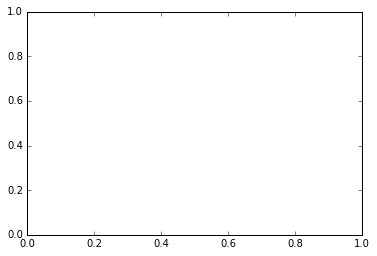

In [21]:
plt.contourf(mesh_2d[0][:, :], 
             mesh_2d[1][:, :],
             values_2d[:, :])
plt.colorbar()

In [ ]:
plt.contourf(x_2d, 
             y_2d,
             values_2d[:, :])
plt.colorbar()

In [22]:
z_2d = (0,)
vars_visit = (('test', 1, 1, tuple(values_2d.ravel())),)
visit_writer.WriteRectilinearMesh('test_visit_ordering_2d.vtk', 1, 
                                  tuple(x_2d), tuple(y_2d), 
                                  tuple(z_2d), vars_visit)

# Filter

In [23]:
x_2d_for_filter = np.linspace(0, 20, 21)

In [24]:
y_2d_for_filter = np.linspace(0, 20, 21)

In [25]:
mesh_for_filter = np.meshgrid(x_2d_for_filter, y_2d_for_filter)

In [26]:
values_2d_for_filter = np.zeros(mesh_for_filter[0].shape)
values_2d_for_filter[::2, ::2] = mesh_for_filter[0][::2, ::2]
values_2d_for_filter[1::2, 1::2] = mesh_for_filter[0][1::2, 1::2]*5

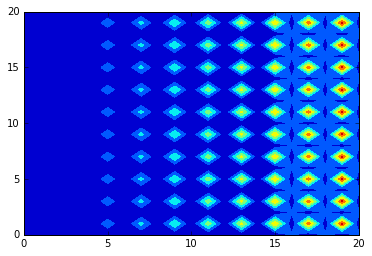

In [27]:
plt.contourf(x_2d_for_filter, y_2d_for_filter,
             values_2d_for_filter)

In [43]:
n = 10
boxcar = np.ones((n,n))/(n*n)
smoothed = convolve_fft(values_2d_for_filter, boxcar)

In [44]:
print smoothed.shape, values_2d_for_filter.shape

(21, 21) (21, 21)


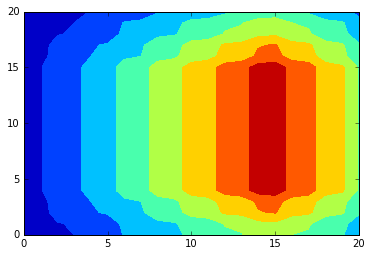

In [45]:
plt.contourf(x_2d_for_filter, y_2d_for_filter,
             smoothed)

Note the edges are not acurate, the highest filtered value is closer to 15 than to the highest peak in the orgional data at 19.

In [31]:
values_2d_for_filter_with_nan = np.array(values_2d_for_filter)
values_2d_for_filter_with_nan[0][0] = np.nan

In [33]:
values_2d_for_filter_with_nan

array([[ nan,   0.,   2.,   0.,   4.,   0.,   6.,   0.,   8.,   0.,  10.,
          0.,  12.,   0.,  14.,   0.,  16.,   0.,  18.,   0.,  20.],
       [  0.,   5.,   0.,  15.,   0.,  25.,   0.,  35.,   0.,  45.,   0.,
         55.,   0.,  65.,   0.,  75.,   0.,  85.,   0.,  95.,   0.],
       [  0.,   0.,   2.,   0.,   4.,   0.,   6.,   0.,   8.,   0.,  10.,
          0.,  12.,   0.,  14.,   0.,  16.,   0.,  18.,   0.,  20.],
       [  0.,   5.,   0.,  15.,   0.,  25.,   0.,  35.,   0.,  45.,   0.,
         55.,   0.,  65.,   0.,  75.,   0.,  85.,   0.,  95.,   0.],
       [  0.,   0.,   2.,   0.,   4.,   0.,   6.,   0.,   8.,   0.,  10.,
          0.,  12.,   0.,  14.,   0.,  16.,   0.,  18.,   0.,  20.],
       [  0.,   5.,   0.,  15.,   0.,  25.,   0.,  35.,   0.,  45.,   0.,
         55.,   0.,  65.,   0.,  75.,   0.,  85.,   0.,  95.,   0.],
       [  0.,   0.,   2.,   0.,   4.,   0.,   6.,   0.,   8.,   0.,  10.,
          0.,  12.,   0.,  14.,   0.,  16.,   0.,  18.,   0.,  20.],

In [40]:
smoothed_with_nan = convolve_fft(values_2d_for_filter_with_nan, boxcar, interpolate_nan=True)
print smoothed_with_nan

[[  1.54545455   1.72727273   2.78787879   3.03030303   4.39393939   4.65
    6.15         6.45         7.95         8.25         9.75        10.05
   11.55        11.85        13.35        13.65        12.          11.64
    9.69         9.27         7.02      ]
 [  1.60606061   1.84848485   2.90909091   3.23232323   4.5959596    4.95
    6.45         6.85         8.35         8.75        10.25        10.65
   12.15        12.55        14.05        14.45        12.8         12.32
   10.37         9.81         7.56      ]
 [  2.06060606   2.3030303    3.71717172   4.04040404   5.85858586   6.2
    8.2          8.6         10.6         11.          13.          13.4
   15.4         15.8         17.8         18.2         16.          15.52
   12.92        12.36         9.36      ]
 [  2.12121212   2.42424242   3.83838384   4.24242424   6.06060606   6.5
    8.5          9.          11.          11.5         13.5         14.
   16.          16.5         18.5         19.          16.8      

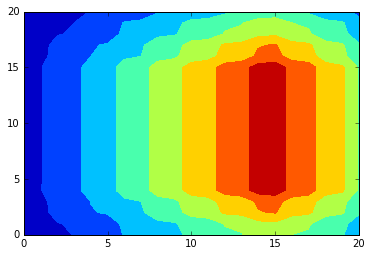

In [41]:
smoothed_with_nan = convolve_fft(values_2d_for_filter_with_nan, boxcar, interpolate_nan=True)
plt.contourf(x_2d_for_filter, y_2d_for_filter,
             smoothed_with_nan)

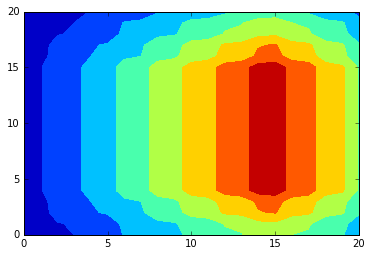

In [42]:
smoothed_with_nan = convolve_fft(values_2d_for_filter_with_nan, boxcar)
plt.contourf(x_2d_for_filter, y_2d_for_filter,
             smoothed_with_nan)

# How does visit plot a 3D mesh 

In [80]:
x_3d = np.linspace(0, 1, 2)

In [82]:
x_3d

array([ 0.,  1.])

In [83]:
y_3d = np.linspace(10, 11, 2)

In [84]:
y_3d

array([ 10.,  11.])

In [85]:
z_3d = np.linspace(20, 21, 2)

In [86]:
z_3d

array([ 20.,  21.])

In [87]:
mesh_3d = np.meshgrid(x, y, z)

In [88]:
values_3d = np.asarray([[[0, 1], 
                         [2, 3]], 
                        [[4, 5], 
                         [6, 7]]])

In [94]:
values_3d.ravel()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [104]:
np.swapaxes(np.swapaxes(values_3d, 1, 2), 0, 1).ravel()

array([0, 2, 4, 6, 1, 3, 5, 7])

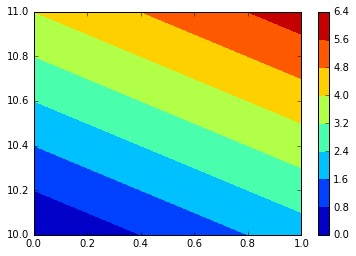

In [96]:
plt.contourf(x_3d, y_3d,
             values_3d[:,:,0])
plt.colorbar()

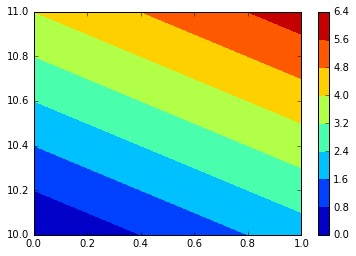

In [93]:
plt.contourf(mesh_3d[0][:, :, 0], mesh_3d[1][:, :, 0],
             values_3d[:, :, 0])
plt.colorbar()

In [110]:
vars_visit = (('test', 1, 1, tuple(np.swapaxes(np.swapaxes(values_3d, 1, 2), 0, 1).ravel())),)
visit_writer.WriteRectilinearMesh('test_visit_ordering_3d.vtk', 1, tuple(x), tuple(y), tuple(z), vars_visit)